In [1]:
import pandas as pd

# Create a dataset
data = {'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        'Sales': [150, 200, 180, 220, 250]}

df = pd.DataFrame(data)

# Descriptive statistics
mean = df['Sales'].mean()
median = df['Sales'].median()
mode = df['Sales'].mode()[0]
std_dev = df['Sales'].std()
min_val = df['Sales'].min()
max_val = df['Sales'].max()

# Print results
print(f"Mean: £{mean}")
print(f"Median: £{median}")
print(f"Mode: £{mode}")
print(f"Standard Deviation: £{std_dev:.2f}")
print(f"Min: £{min_val}, Max: £{max_val}")


Mean: £200.0
Median: £200.0
Mode: £150
Standard Deviation: £38.08
Min: £150, Max: £250


In [3]:
import pandas as pd

# Load times dataset
load_times = [1.2, 1.5, 2.0, 1.2, 3.2, 1.9, 80]

# Calculate mean and median
mean = pd.Series(load_times).mean()
median = pd.Series(load_times).median()
mode = pd.Series(load_times).mode()[0]
std_dev = pd.Series(load_times).std()

print(f"Mean load time: {mean:.2f} seconds")
print(f"Median load time: {median:.2f} seconds")
print(f"Mode load time: {mode:.2f} seconds")
print(f"Standard Deviation of load times: {std_dev:.2f} seconds")


Mean load time: 13.00 seconds
Median load time: 1.90 seconds
Mode load time: 1.20 seconds
Standard Deviation of load times: 29.55 seconds


In [4]:
import pandas as pd

load_times = [1.2, 1.5, 2.0, 1.2, 3.2, 1.9, 80]

series = pd.Series(load_times)

mode = series.mode()[0]         # Mode
std_dev = series.std()          # Standard deviation
range_val = series.max() - series.min()  # Range

print(f"Mode: {mode} seconds")
print(f"Standard Deviation: {std_dev:.2f} seconds")
print(f"Range: {range_val} seconds")


Mode: 1.2 seconds
Standard Deviation: 29.55 seconds
Range: 78.8 seconds


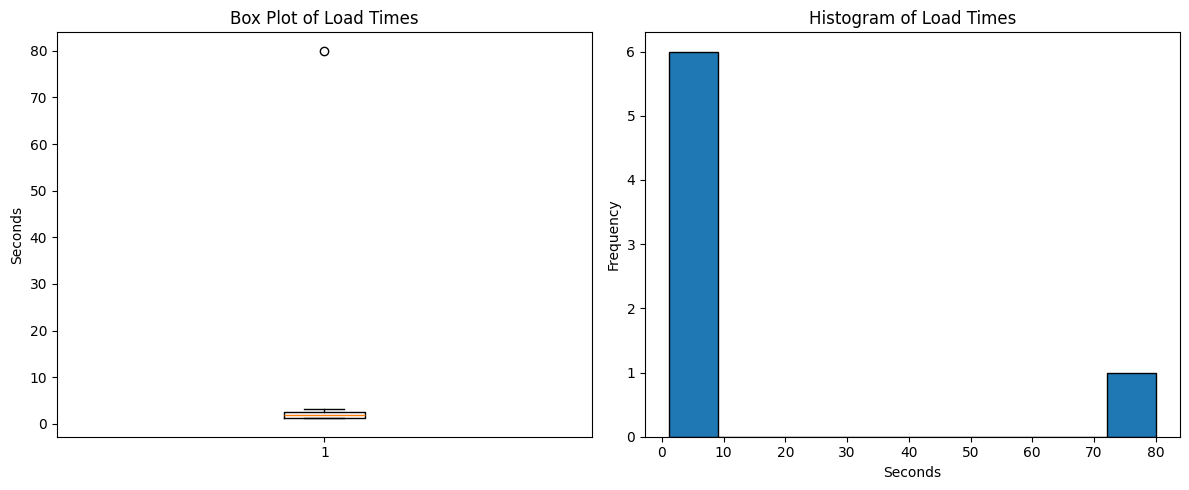

In [5]:
import matplotlib.pyplot as plt

load_times = [1.2, 1.5, 2.0, 1.2, 3.2, 1.9, 80]

plt.figure(figsize=(12,5))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(load_times, vert=True)
plt.title('Box Plot of Load Times')
plt.ylabel('Seconds')

# Histogram
plt.subplot(1, 2, 2)
plt.hist(load_times, bins=10, edgecolor='black')
plt.title('Histogram of Load Times')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Descriptive Statistics for Goals:
count     7.00000
mean      5.00000
std       3.91578
min       0.00000
25%       2.50000
50%       5.00000
75%       6.50000
max      12.00000
Name: Goals, dtype: float64

Median Goals: 5.0
Mode Goals: 0


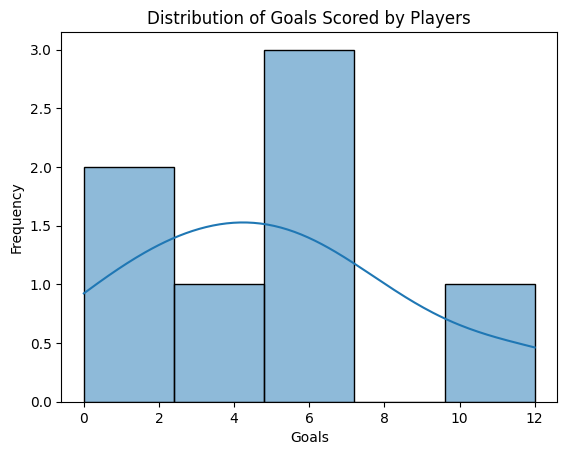

<Axes: xlabel='Goals', ylabel='Assists'>

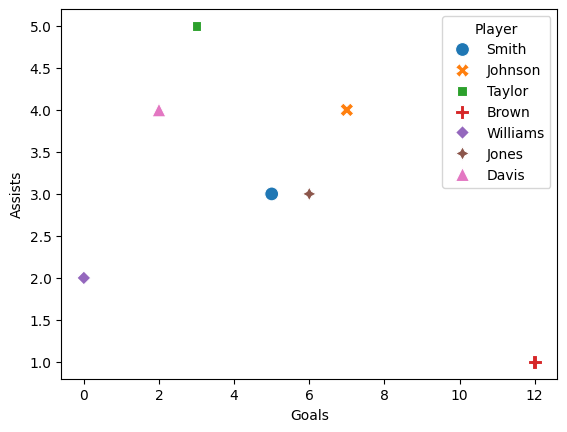

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: player goals in a season
data = {
    'Player': ['Smith', 'Johnson', 'Taylor', 'Brown', 'Williams', 'Jones', 'Davis'],
    'Goals': [5, 7, 3, 12, 0, 6, 2],
    'Assists': [3, 4, 5, 1, 2, 3, 4],
    'Appearances': [30, 28, 32, 25, 34, 31, 29]
}

df = pd.DataFrame(data)

# Calculate descriptive statistics
print("Descriptive Statistics for Goals:")
print(df['Goals'].describe())

print("\nMedian Goals:", df['Goals'].median())
print("Mode Goals:", df['Goals'].mode()[0])

# Visualize Goals distribution
sns.histplot(df['Goals'], bins=5, kde=True)
plt.title('Distribution of Goals Scored by Players')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()
# Visualize Goals vs Assists
sns.scatterplot(data=df, x='Goals', y='Assists', hue='Player', style='Player', s=100)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (use latin-1 to allow non-UTF8 bytes like 0xA0)
df = pd.read_csv("../Data/results.csv", encoding='latin-1')

# Quick look at the dataset
print(df.head())
print(df.columns)

# Rename for convenience if needed
df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result', 'Attendance': 'Attendance'}, inplace=True)

# 1. Match outcome analysis
result_counts = df['Result'].value_counts()
print("Match Results Count:\n", result_counts)

# 2. Average goals
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']
avg_goals = df['TotalGoals'].mean()
print(f"Average goals per match: {avg_goals:.2f}")

# 3. Median attendance
df.columns = df.columns.str.strip()
median_attendance = df['Attendance'].median()
print(f"Median attendance: {median_attendance}")

# 4. Outlier detection in attendance
q1 = df['Attendance'].quantile(0.25)
q3 = df['Attendance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Attendance'] < lower_bound) | (df['Attendance'] > upper_bound)]
print("Outlier Attendances:\n", outliers[['HomeTeam', 'AwayTeam', 'Attendance']])

# 5. Visualizations

# Bar chart: Match results
plt.figure(figsize=(6,4))
result_counts.plot(kind='bar', color='skyblue')
plt.title("Match Results (W/D/L)")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

# Boxplot: Attendance
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Attendance'])
plt.title("Attendance Distribution")
plt.ylabel("Attendance")
plt.tight_layout()
plt.show()

# Scatterplot: Goals vs Attendance
plt.figure(figsize=(6,4))
sns.scatterplot(x='TotalGoals', y='Attendance', data=df)
plt.title("Goals vs Attendance")
plt.xlabel("Total Goals")
plt.ylabel("Attendance")
plt.tight_layout()
plt.show()


    Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   H   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   D   

   HTHG  HTAG  HTR  ... HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
0   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 23 columns]
Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG

KeyError: 'Attendance'

Match Results Count:
 Result
H    5088
A    3161
D    2864
Name: count, dtype: int64
Average goals per match: 2.66
Column 'Attendance' not found; skipping attendance analysis.


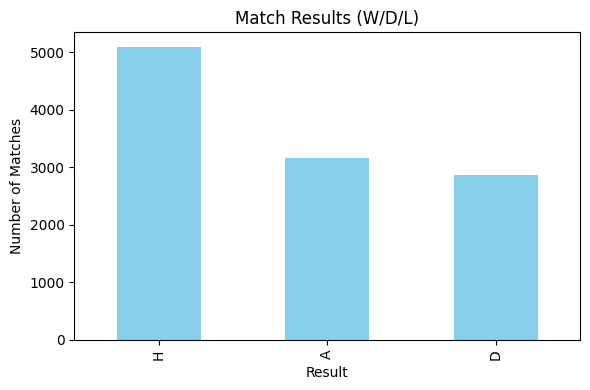

In [20]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename for convenience (only actual columns)
df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result'}, inplace=True)

# 1. Match outcome analysis
result_counts = df['Result'].value_counts()
print("Match Results Count:\n", result_counts)

# 2. Average goals
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']
avg_goals = df['TotalGoals'].mean()
print(f"Average goals per match: {avg_goals:.2f}")

# 3 & 4. Attendance analysis (if column exists)
if 'Attendance' in df.columns:
    # Median attendance
    median_attendance = df['Attendance'].median()
    print(f"Median attendance: {median_attendance}")

    # Outlier detection in attendance
    q1 = df['Attendance'].quantile(0.25)
    q3 = df['Attendance'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df['Attendance'] < lower_bound) | (df['Attendance'] > upper_bound)]
    print("Outlier Attendances:\n", outliers[['HomeTeam', 'AwayTeam', 'Attendance']])
else:
    print("Column 'Attendance' not found; skipping attendance analysis.")

# 5. Visualizations

# Bar chart: Match results
plt.figure(figsize=(6,4))
result_counts.plot(kind='bar', color='skyblue')
plt.title("Match Results (W/D/L)")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

# Attendance visualizations (only if column exists)
if 'Attendance' in df.columns:
    # Boxplot: Attendance
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df['Attendance'])
    plt.title("Attendance Distribution")
    plt.ylabel("Attendance")
    plt.tight_layout()
    plt.show()

    # Scatterplot: Goals vs Attendance
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='TotalGoals', y='Attendance', data=df)
    plt.title("Goals vs Attendance")
    plt.xlabel("Total Goals")
    plt.ylabel("Attendance")
    plt.tight_layout()
    plt.show()